# Ejercicio 2

Tom Arc - A01562405 <br />
Alejandro hermosillo - A01634552 <br />
Mauricio Flores - A01639917

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def discrete_perceptron(alpha, y, y_pred, X):
  return alpha*(y-y_pred)*X

def svm(alpha, y, y_pred, X):

  if y*y_pred < 1:
    tmp = 1
  else:
    tmp = 0
    
  return alpha*y*X*tmp

In [43]:
class Perceptron:

  def __init__(self, learning_rule, solver = 'sgd', batch_size = 1, alpha = 0.0002):
    self.learning_rule = learning_rule
    self.solver = solver
    self.batch_size = batch_size
    self.alpha = alpha

  def fit(self, X, y, X_test, y_test, epochs):
    
    if self.solver == 'sgd':
      self.batch_size = 1
    elif self.solver == 'bgd':
      self.batch_size = X.shape[0]-1
    elif self.solver != 'mbgd':
      print('Warning: Solver not found')

    self.W = np.random.rand((X.shape[1]))*2-1
    self.errors = np.zeros((epochs))
    for i in range(epochs):
      indices = np.arange(X.shape[0])
      np.random.shuffle(indices)
      X = X[indices]
      y = y[indices]
      diff_w = np.zeros(X.shape[1])
      for j in range(X.shape[0]):
        y_pred = np.sign(np.dot(self.W, X[j]))
        
        if y[j] != y_pred:
          diff_w += self.learning_rule(self.alpha, y[j], y_pred, X[j])
        
        if j != 0 and j % self.batch_size == 0:
          self.W += diff_w
          diff_w = np.zeros(X.shape[1]) 

      self.W += diff_w
      self.errors[i] = accuracy_score(y_test, self.predict(X_test))

  def predict(self, X):
    y_pred = []
    for i in range(X.shape[0]):
      y_pred.append(np.sign(np.dot(self.W, X[i])))

    return np.array(y_pred)

In [5]:
data = pd.read_csv('/content/drive/Shareddrives/Redes neuronales/data/misterious_data_1.txt', sep="\t", header=None)

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
0,1,0.469168,0.178952,0.255712,0.744816,1.246886,1.254866,0.804426,0.412733,0.258974,...,0.993407,-0.592111,-1.301687,-1.066966,-0.722061,-0.622120,-0.396476,0.133550,0.594973,0.691093
1,1,0.184388,0.194901,0.386090,0.796802,1.066347,0.799498,0.074394,-0.544738,-0.580456,...,-0.003908,-0.167604,-0.428945,-0.725686,-1.053406,-1.276862,-1.183251,-0.693138,0.016754,0.573650
2,1,-0.173341,0.145202,-0.304082,-1.414886,-2.213521,-1.913048,-0.831063,-0.007732,0.002380,...,1.902134,3.393694,3.131702,1.403325,-0.030289,-0.271096,-0.198293,-0.751224,-1.350148,-0.882644
3,1,-0.268590,0.599522,1.307578,1.167486,0.251935,-0.585627,-0.553452,0.185590,0.613321,...,-1.296833,-0.876860,-1.043880,-1.516590,-1.531095,-1.016308,-0.483549,-0.267818,-0.367672,-0.666145
4,1,2.525379,2.852672,2.172197,0.637552,-0.600348,-0.702175,-0.074887,0.279032,-0.025487,...,-0.890283,-0.624969,-0.753863,-0.854603,-0.736751,-0.614611,-0.587151,-0.409589,0.087732,0.646462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2,-0.247813,-1.636876,-1.686496,-0.851443,-0.189284,-0.175917,-0.612440,-1.132900,-1.399937,...,-0.301084,-0.253173,-0.068328,0.651730,1.447875,1.344575,0.265519,-0.599335,-0.294434,0.653921
524,2,0.073005,-0.521397,-1.092433,-1.111963,-0.473837,0.176168,0.095479,-0.618298,-1.080112,...,0.246759,0.079766,-0.293788,-0.488293,-0.429789,-0.361705,-0.473447,-0.694671,-0.814194,-0.709706
525,2,-0.904484,0.158150,1.423261,2.229514,2.251798,1.672233,1.008534,0.678230,0.655435,...,-0.832072,-0.794224,-0.913966,-0.968323,-0.605201,0.074039,0.539398,0.548744,0.461137,0.636099
526,2,-0.393102,-0.008132,0.270135,0.200096,0.000654,0.042362,0.569617,1.473273,2.188128,...,1.352715,0.236024,-0.595686,-0.896065,-0.694218,-0.239846,0.142306,0.190111,-0.167468,-0.708688


In [7]:
X = np.array(data.iloc[:, 1:])
bias = np.ones(X.shape[0])[np.newaxis].T
X = np.hstack((bias, X))
y = np.array(data.iloc[:, 0])

In [8]:
for i in range(y.shape[0]):
  if y[i] == 2:
    y[i] = -1

## Modelo perceptron de una neurona con descenso de gradiente estocástico

Precision del modelo:  0.757663971248877


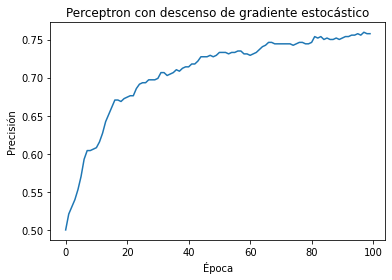

In [99]:
perceptron = Perceptron(discrete_perceptron, 'sgd')
kf = StratifiedKFold(n_splits = 5)

acc = 0
errors = np.zeros(100)
for train, test in kf.split(X, y):
  perceptron.fit(X[train], y[train], X[test], y[test], 100)
  y_pred = perceptron.predict(X[test])
  acc += accuracy_score(y_pred, y[test])
  errors += perceptron.errors

errors = errors/5
plt.title('Perceptron con descenso de gradiente estocástico')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.plot(errors)
print('Precision del modelo: ', acc/5)

## Modelo perceptron de una neurona con descenso de gradiente de lote

Precision del modelo:  0.7822102425876011


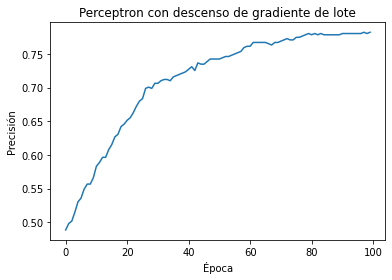

In [106]:
perceptron = Perceptron(discrete_perceptron, 'bgd')
kf = StratifiedKFold(n_splits = 5)

acc = 0
errors = np.zeros(100)
for train, test in kf.split(X, y):
  perceptron.fit(X[train], y[train], X[test], y[test], 100)
  y_pred = perceptron.predict(X[test])
  acc += accuracy_score(y_pred, y[test])
  errors += perceptron.errors

errors = errors/5
plt.title('Perceptron con descenso de gradiente de lote')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.plot(errors)
print('Precision del modelo: ', acc/5)

## Modelo perceptron de una neurona con descenso de gradiente de mini-lote

Precision del modelo:  0.7860017969451931


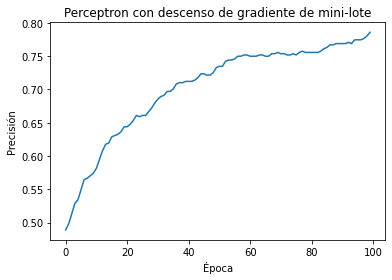

In [107]:
perceptron = Perceptron(discrete_perceptron, 'mbgd', 5)
kf = StratifiedKFold(n_splits = 5)

acc = 0
errors = np.zeros(100)
for train, test in kf.split(X, y):
  perceptron.fit(X[train], y[train], X[test], y[test], 100)
  y_pred = perceptron.predict(X[test])
  acc += accuracy_score(y_pred, y[test])
  errors += perceptron.errors

errors = errors/5
plt.title('Perceptron con descenso de gradiente de mini-lote')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.plot(errors)
print('Precision del modelo: ', acc/5)

## Modelo perceptron de una neurona con descenso de gradiente estocástico utilizando regla de aprendizaje de svm

Precision del modelo:  0.7235220125786164


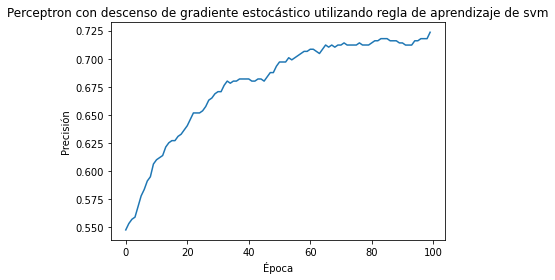

In [111]:
perceptron = Perceptron(svm, 'sgd')
kf = StratifiedKFold(n_splits = 5)

acc = 0
errors = np.zeros(100)
for train, test in kf.split(X, y):
  perceptron.fit(X[train], y[train], X[test], y[test], 100)
  y_pred = perceptron.predict(X[test])
  acc += accuracy_score(y_pred, y[test])
  errors += perceptron.errors

errors = errors/5
plt.title('Perceptron con descenso de gradiente estocástico utilizando regla de aprendizaje de svm')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.plot(errors)
print('Precision del modelo: ', acc/5)

## Modelo perceptron de una neurona con descenso de gradiente de lote utilizando regla de aprendizaje de svm

Precision del modelo:  0.7291284815813117


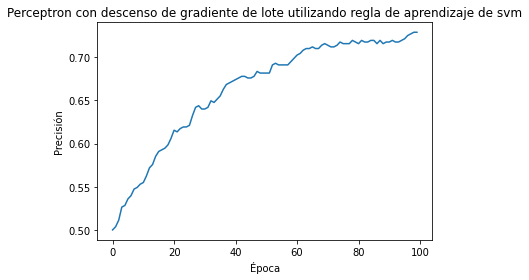

In [133]:
perceptron = Perceptron(svm, 'bgd')
kf = StratifiedKFold(n_splits = 5)

acc = 0
errors = np.zeros(100)
for train, test in kf.split(X, y):
  perceptron.fit(X[train], y[train], X[test], y[test], 100)
  y_pred = perceptron.predict(X[test])
  acc += accuracy_score(y_pred, y[test])
  errors += perceptron.errors

errors = errors/5
plt.title('Perceptron con descenso de gradiente de lote utilizando regla de aprendizaje de svm')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.plot(errors)
print('Precision del modelo: ', acc/5)

## Modelo perceptron de una neurona con descenso de gradiente de mini-lote utilizando regla de aprendizaje de svm

Precision del modelo:  0.750062893081761


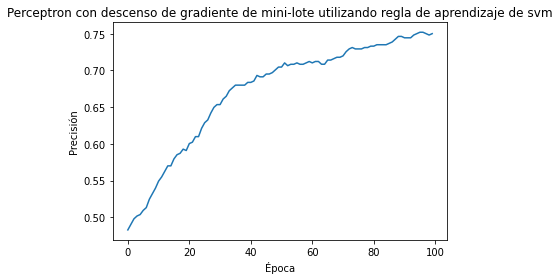

In [116]:
perceptron = Perceptron(svm, 'mbgd', 5)
kf = StratifiedKFold(n_splits = 5)

acc = 0
errors = np.zeros(100)
for train, test in kf.split(X, y):
  perceptron.fit(X[train], y[train], X[test], y[test], 100)
  y_pred = perceptron.predict(X[test])
  acc += accuracy_score(y_pred, y[test])
  errors += perceptron.errors

errors = errors/5
plt.title('Perceptron con descenso de gradiente de mini-lote utilizando regla de aprendizaje de svm')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.plot(errors)
print('Precision del modelo: ', acc/5)